## Question 1

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import Subset

# Load dataset and transform
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset = Subset(train_dataset,list(range(600)))
test_dataset = Subset(test_dataset,list(range(600)))


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Create MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(512, 512)
        self.batch_norm = nn.BatchNorm1d(512)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.batch_norm(self.fc2(x)))
        x = self.fc3(x)
        return x

# Create instance of MLP model
mlp_model = MLP()

print(mlp_model)

MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (batch_norm): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## Question 2

Epoch 1/20, Training Loss: 1.51, Test Loss: 1.81, Training err: 28.50%, Test err: 44.33%
Epoch 2/20, Training Loss: 0.53, Test Loss: 1.08, Training err: 8.83%, Test err: 24.67%
Epoch 3/20, Training Loss: 0.28, Test Loss: 0.71, Training err: 6.83%, Test err: 21.83%
Epoch 4/20, Training Loss: 0.17, Test Loss: 0.52, Training err: 1.50%, Test err: 16.17%
Epoch 5/20, Training Loss: 0.12, Test Loss: 0.47, Training err: 0.83%, Test err: 14.67%
Epoch 6/20, Training Loss: 0.08, Test Loss: 0.46, Training err: 0.33%, Test err: 14.50%
Epoch 7/20, Training Loss: 0.05, Test Loss: 0.45, Training err: 0.17%, Test err: 14.33%
Epoch 8/20, Training Loss: 0.04, Test Loss: 0.44, Training err: 0.00%, Test err: 14.67%
Epoch 9/20, Training Loss: 0.03, Test Loss: 0.44, Training err: 0.00%, Test err: 14.33%
Epoch 10/20, Training Loss: 0.03, Test Loss: 0.45, Training err: 0.00%, Test err: 14.17%
Epoch 11/20, Training Loss: 0.02, Test Loss: 0.45, Training err: 0.00%, Test err: 15.17%
Epoch 12/20, Training Loss: 0

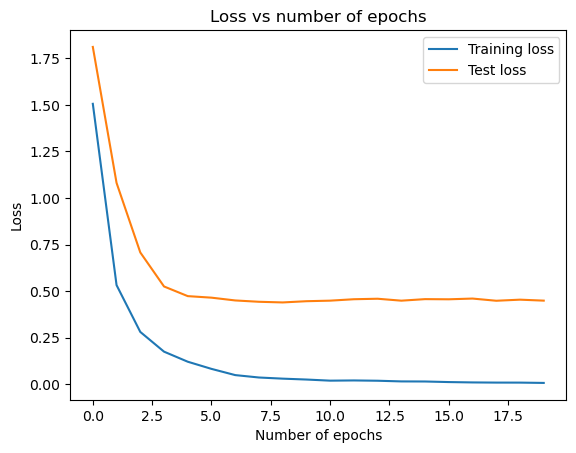

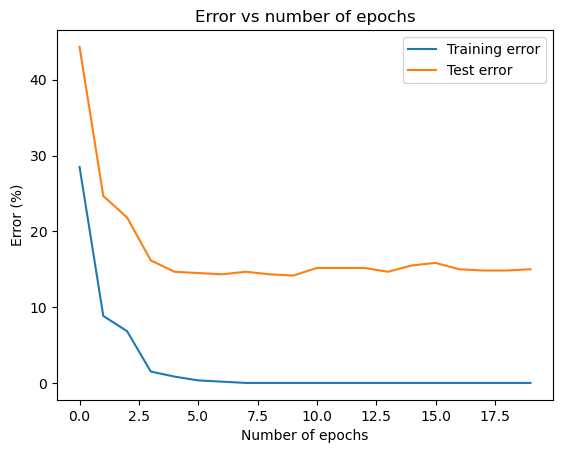

In [6]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Create instance of MLP model
mlp_model = MLP()

# Define loss criterion as cross entropy loss
criterion = nn.CrossEntropyLoss()

# Define optimizer with learning rate of 0.01 and momentum of 0.9
optimizer = optim.SGD(mlp_model.parameters(), lr=0.01, momentum=0.9)

# Use DataLoader to batch and shuffle in each epoch
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Store losses
train_losses = []
test_losses = []

# Store errors
train_errs = []
test_errs = []

num_epochs = 20

for epoch in range(num_epochs):
    # Set model to training mode
    mlp_model.train()
    
    train_loss = 0.0
    
    # Train on training data
    for inputs, labels in train_loader:
        # Flatten input images
        inputs = inputs.view(inputs.size(0), -1)
        
        # Set gradients to 0
        optimizer.zero_grad()

        # Find outputs
        outputs = mlp_model(inputs)

        # Calculate loss and update weights
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    # Set model to evaluation mode
    mlp_model.eval()
    
    test_loss = 0.0
    
    # Compute loss on test data
    for inputs, labels in test_loader:
        # Flatten input images
        inputs = inputs.view(inputs.size(0), -1)

        # Find outputs
        outputs = mlp_model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        
    # Store losses in list
    train_losses.append(train_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))
    
    # Compute errors on test data
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            # Flatten input images
            inputs = inputs.view(inputs.size(0), -1)
            
            # Find outputs
            outputs = mlp_model(inputs)
            
            # Find class with the highest score
            _, predicted = torch.max(outputs.data, 1)
            
            # Calculate accuracy and error
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            
    test_acc = test_correct / test_total
    test_err = (1 - test_acc) * 100

    test_errs.append(test_err)
    
    # Compute errors on training data
    train_correct = 0
    train_total = 0

    with torch.no_grad():
        for inputs, labels in train_loader:
            # Flatten input images
            inputs = inputs.view(inputs.size(0), -1)
            
            # Find outputs
            outputs = mlp_model(inputs)
            
            # Find class with the highest score
            _, predicted = torch.max(outputs.data, 1)
            
            # Calculate accuracy and error
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
    train_acc = train_correct / train_total
    train_err = (1 - train_acc) * 100

    train_errs.append(train_err)
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss / len(train_loader):.2f}, Test Loss: {test_loss / len(test_loader):.2f}, Training err: {train_err:.2f}%, Test err: {test_err:.2f}%')
    
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['Training loss', 'Test loss'])
plt.title("Loss vs number of epochs")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.show()

plt.figure()
plt.plot(train_errs)
plt.plot(test_errs)
plt.legend(['Training error', 'Test error'])
plt.title("Error vs number of epochs")
plt.ylabel("Error (%)")
plt.xlabel("Number of epochs")
plt.show()


## Question 4

In [7]:
# Create MLP model
class MLP_2(nn.Module):
    def __init__(self):
        super(MLP_2, self).__init__()
        
        self.fc1 = nn.Linear(784, 512)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(512, 512)
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(512, 512)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.relu3 = nn.ReLU()   
        
        self.fc4 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.batch_norm1(self.fc2(x)))
        x = self.relu3(self.batch_norm2(self.fc3(x)))
        x = self.fc4(x)
        return x

# Create instance of MLP model
mlp_2 = MLP_2()

# Define loss criterion as cross entropy loss
criterion = nn.CrossEntropyLoss()

# Define optimizer with learning rate of 0.01 and momentum of 0.9
optimizer = optim.SGD(mlp_2.parameters(), lr=0.01, momentum=0.9)

print(mlp_2)

MLP_2(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (batch_norm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=512, out_features=10, bias=True)
)


Epoch 1/20, Training Loss: 1.53, Test Loss: 2.03, Training err: 34.67%, Test err: 51.83%
Epoch 2/20, Training Loss: 0.49, Test Loss: 1.25, Training err: 9.33%, Test err: 27.33%
Epoch 3/20, Training Loss: 0.22, Test Loss: 0.74, Training err: 3.83%, Test err: 21.50%
Epoch 4/20, Training Loss: 0.12, Test Loss: 0.54, Training err: 0.67%, Test err: 14.83%
Epoch 5/20, Training Loss: 0.06, Test Loss: 0.61, Training err: 1.50%, Test err: 18.83%
Epoch 6/20, Training Loss: 0.04, Test Loss: 0.51, Training err: 0.00%, Test err: 14.67%
Epoch 7/20, Training Loss: 0.02, Test Loss: 0.47, Training err: 0.00%, Test err: 16.17%
Epoch 8/20, Training Loss: 0.02, Test Loss: 0.46, Training err: 0.00%, Test err: 15.50%
Epoch 9/20, Training Loss: 0.01, Test Loss: 0.45, Training err: 0.00%, Test err: 14.67%
Epoch 10/20, Training Loss: 0.01, Test Loss: 0.45, Training err: 0.00%, Test err: 14.50%
Epoch 11/20, Training Loss: 0.01, Test Loss: 0.45, Training err: 0.00%, Test err: 14.67%
Epoch 12/20, Training Loss: 0

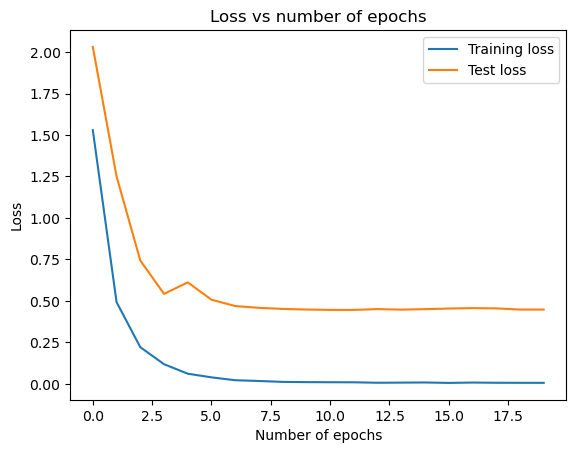

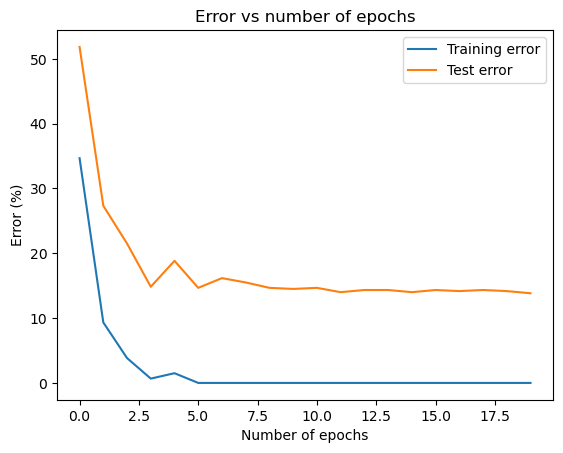

In [9]:
# Create instance of MLP model
mlp_model = MLP_2()

# Define loss criterion as cross entropy loss
criterion = nn.CrossEntropyLoss()

# Define optimizer with learning rate of 0.01 and momentum of 0.9
optimizer = optim.SGD(mlp_model.parameters(), lr=0.01, momentum=0.9)

# Use DataLoader to batch and shuffle in each epoch
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Store losses
train_losses = []
test_losses = []

# Store errors
train_errs = []
test_errs = []

num_epochs = 20

for epoch in range(num_epochs):
    # Set model to training mode
    mlp_model.train()
    
    train_loss = 0.0
    
    # Train on training data
    for inputs, labels in train_loader:
        # Flatten input images
        inputs = inputs.view(inputs.size(0), -1)
        
        # Set gradients to 0
        optimizer.zero_grad()

        # Find outputs
        outputs = mlp_model(inputs)

        # Calculate loss and update weights
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    # Set model to evaluation mode
    mlp_model.eval()
    
    test_loss = 0.0
    
    # Compute loss on test data
    for inputs, labels in test_loader:
        # Flatten input images
        inputs = inputs.view(inputs.size(0), -1)

        # Find outputs
        outputs = mlp_model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        
    # Store losses in list
    train_losses.append(train_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))
    
    # Compute errors on test data
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            # Flatten input images
            inputs = inputs.view(inputs.size(0), -1)
            
            # Find outputs
            outputs = mlp_model(inputs)
            
            # Find class with the highest score
            _, predicted = torch.max(outputs.data, 1)
            
            # Calculate accuracy and error
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
            
    test_acc = test_correct / test_total
    test_err = (1 - test_acc) * 100

    test_errs.append(test_err)
    
    # Compute errors on training data
    train_correct = 0
    train_total = 0

    with torch.no_grad():
        for inputs, labels in train_loader:
            # Flatten input images
            inputs = inputs.view(inputs.size(0), -1)
            
            # Find outputs
            outputs = mlp_model(inputs)
            
            # Find class with the highest score
            _, predicted = torch.max(outputs.data, 1)
            
            # Calculate accuracy and error
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
    train_acc = train_correct / train_total
    train_err = (1 - train_acc) * 100

    train_errs.append(train_err)
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss / len(train_loader):.2f}, Test Loss: {test_loss / len(test_loader):.2f}, Training err: {train_err:.2f}%, Test err: {test_err:.2f}%')
    
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['Training loss', 'Test loss'])
plt.title("Loss vs number of epochs")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.show()

plt.figure()
plt.plot(train_errs)
plt.plot(test_errs)
plt.legend(['Training error', 'Test error'])
plt.title("Error vs number of epochs")
plt.ylabel("Error (%)")
plt.xlabel("Number of epochs")
plt.show()